# DSLabs functions

In [14]:
%run "scripts/dslabs_functions.py"


# Data functions

In [1]:
%run "scripts/data_functions.py"


data_functions loaded


# Load

In [2]:
import pandas as pd
import numpy as np


filepath=r'data/df_merch_0_2024_agg_time_agg_input.csv'


file_tag = "Google Merch Store 2024-2025"


# test_data=True
test_data=False


data=pd.read_csv(filepath, decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)

 
target='Sessions'
series: Series = data[target]

test_split_threshold = 0.75

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 427 entries, 2024-01-04 to 2025-03-05
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sessions                         427 non-null    float64
 1   Seven-day active users           427 non-null    float64
 2   28-day active users              427 non-null    float64
 3   Events per session               427 non-null    float64
 4   Add to baskets                   427 non-null    float64
 5   Checkouts                        427 non-null    float64
 6   E-commerce purchases             427 non-null    float64
 7   Average purchase revenue         427 non-null    float64
 8   Purchase revenue                 427 non-null    float64
 9   Average session duration         427 non-null    float64
 10  ARPU                             427 non-null    float64
 11  ARPPU                            427 non-null    float64
 12  Vie

# Differentiation - no diff

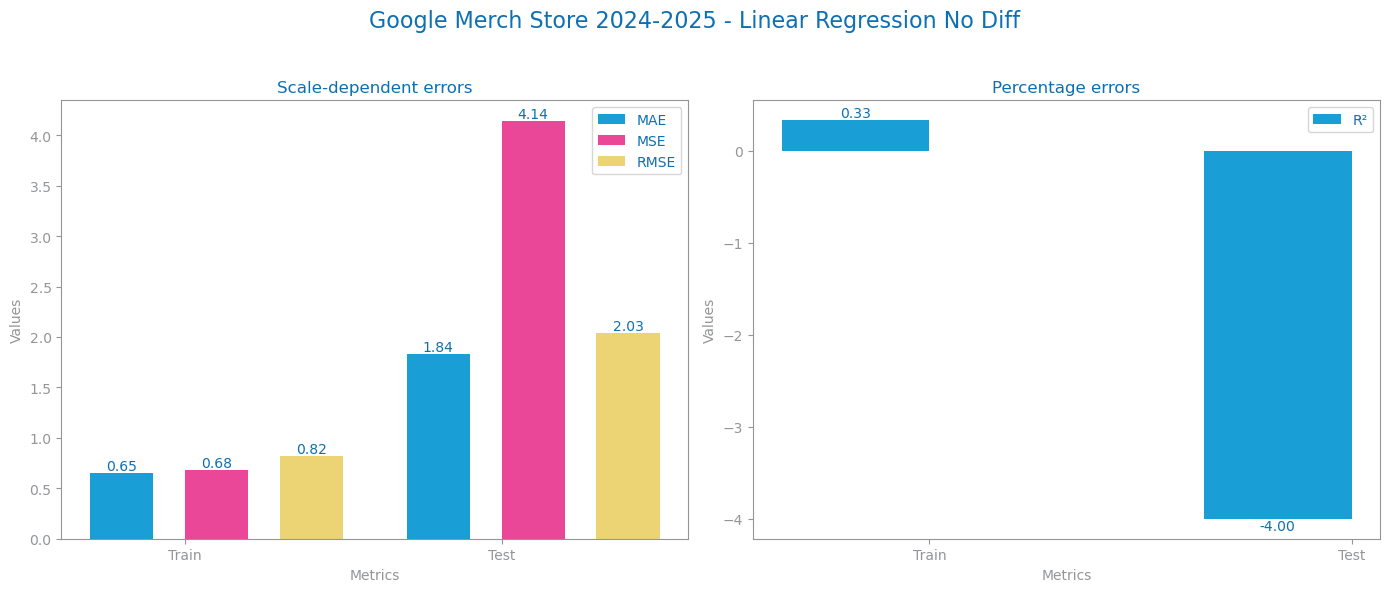

<Figure size 640x480 with 0 Axes>

In [3]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression
from numpy import arange


data_0 = data.copy()

# Split the data into train and test sets
train_0, test_0 = series_train_test_split(data_0, trn_pct=test_split_threshold)


# Ensure no data leakage
assert not set(train_0.index).intersection(set(test_0.index)), "Data leakage detected: Train and test sets overlap."


# Prepare the training and testing data from dataframes with features and target
# trnX_0 = train_0.drop(columns=[target])
# trnY_0 = train_0[target]
# tstX_0 = test_0.drop(columns=[target])
# tstY_0 = test_0[target]


# Prepare the training and testing data using the time index as the feature
trnX_0 = arange(len(train_0)).reshape(-1, 1)
trnY_0 = train_0[target].to_numpy()
tstX_0 = arange(len(train_0), len(data_0)).reshape(-1, 1)
tstY_0 = test_0[target].to_numpy()


# Fit the linear regression model
model_0 = LinearRegression()
model_0.fit(trnX_0, trnY_0)

# Predict the training and testing data
prd_trn_0 = Series(model_0.predict(trnX_0), index=train_0.index)
prd_tst_0 = Series(model_0.predict(tstX_0), index=test_0.index)

# Plot the forecasting evaluation
plot_single_model_evaluation(train_0[target], test_0[target], prd_trn_0, prd_tst_0, title=f"{file_tag} - Linear Regression No Diff")
savefig(f"images/{file_tag}_linear_regression_eval_no_diff.png")

## no differentiating plot

<Axes: xlabel='Date', ylabel='Sessions'>

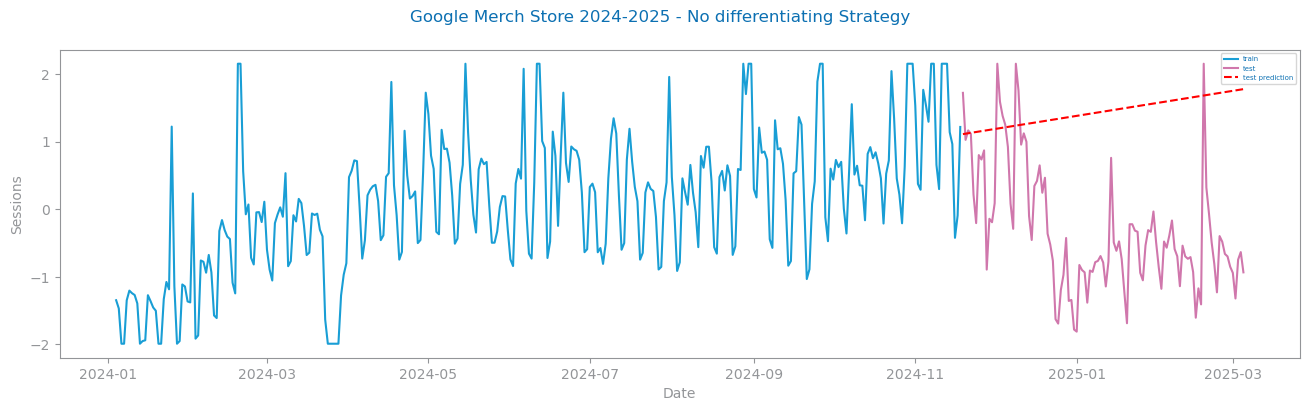

In [4]:
plot_forecasting_series(
    train_0[target],
    test_0[target],
    prd_tst_0,
    title=f"{file_tag} - No differentiating Strategy",
    xlabel='Date',
    ylabel=target,
)

# Differentiation 1

## Differentiation1 strategy Application

In [5]:

def apply_strategy_1(df):

    df_copy=df.copy()
    df_diff = df_copy.diff(periods=1).dropna()

    return df_diff


data_1=apply_strategy_1(data)

series_1: Series = data_1[target]

data_1



,Sessions,Seven-day active users,28-day active users,Events per session,Add to baskets,Checkouts,E-commerce purchases,Average purchase revenue,Purchase revenue,Average session duration,...,Sessions cpc,Sessions cpm,Sessions email,Sessions organic,Sessions other,Sessions referral,season,commercial_season,is_weekend,is_holiday
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-05,-0.121695,0.000000,0.000000,0.000000,0.215332,-0.025022,0.203888,1.471468,0.700516,0.000000,...,-0.210970,0.0,-0.160315,-0.262208,0.0,-0.033064,0.000000,0.000000,0.000000,0.0
2024-01-06,-0.522227,0.000000,0.000000,-1.086987,-1.237101,-0.688099,-1.304886,-2.184507,-1.564885,-0.899948,...,0.074460,0.0,-0.320629,-0.931289,0.0,-0.257897,0.000000,-0.719137,2.213594,0.0
2024-01-07,0.000000,0.000000,0.000000,1.086987,0.189998,0.087576,0.326221,-0.334707,0.043710,-0.425690,...,0.000000,0.0,0.012332,0.036167,0.0,0.033064,0.000000,0.000000,0.000000,0.0
2024-01-08,0.642641,0.000000,0.000000,-0.788238,0.460218,0.212685,0.244666,0.326849,0.239275,1.247596,...,-0.012410,0.0,0.443948,1.211580,0.0,0.297573,0.000000,0.000000,-2.213594,0.0
2024-01-09,0.143471,0.000000,0.000000,0.725753,0.303997,0.688099,0.652443,1.545545,1.013142,0.078042,...,0.086870,0.0,-0.246638,-0.189874,0.0,-0.026451,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,-0.090951,-0.012728,-0.004056,-1.656451,-0.738883,-1.050914,-0.978664,-0.761738,-0.873715,-2.188044,...,-0.583271,0.0,-0.283634,-1.283913,0.0,-0.747240,0.951685,0.719137,2.213594,0.0
2025-03-02,-0.379175,-0.017624,-0.008691,1.020677,0.075999,0.250218,0.407777,-0.344787,0.156170,1.625497,...,0.347481,0.0,0.073991,0.379749,0.0,-0.046289,0.000000,0.000000,0.000000,0.0
2025-03-03,0.575167,-0.080286,-0.024721,1.298542,0.789549,1.100958,0.448555,1.223548,0.663051,1.303864,...,0.570861,0.0,0.382289,1.401454,0.0,0.985298,0.000000,0.000000,-2.213594,0.0


## Differentiation evaluate

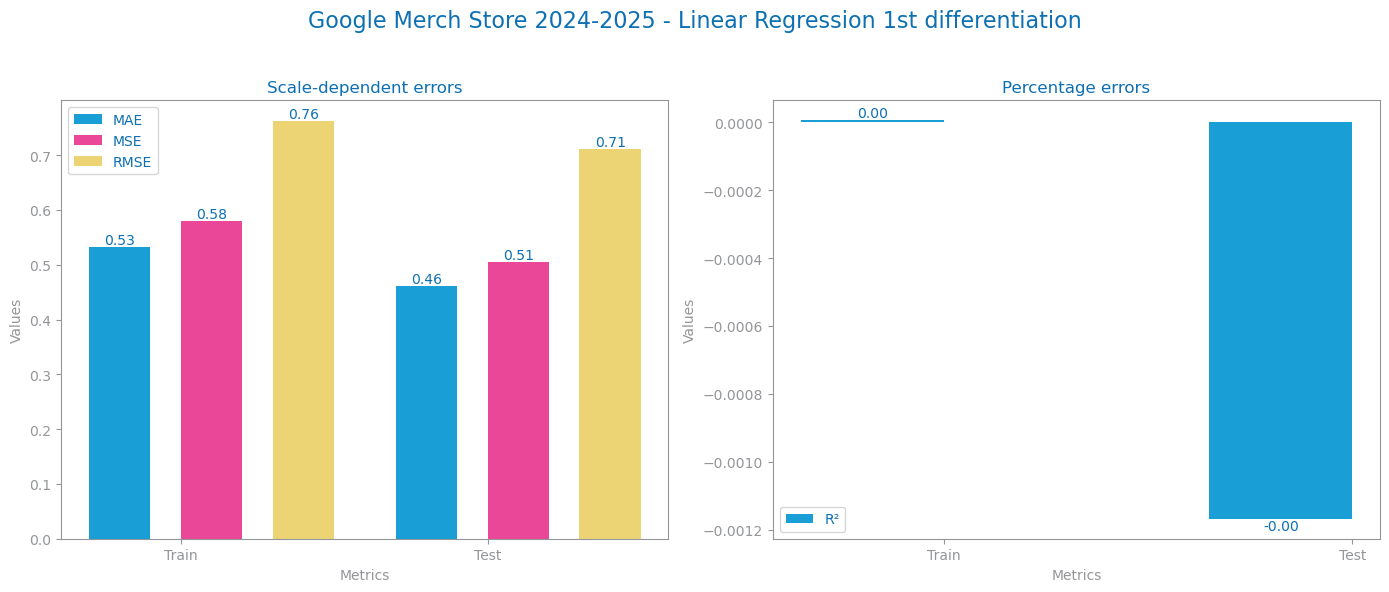

<Figure size 640x480 with 0 Axes>

In [6]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression
from numpy import arange


# Split the data into train and test sets
train_1, test_1 = series_train_test_split(data_1, trn_pct=test_split_threshold)

# Ensure no data leakage
assert not set(train_1.index).intersection(set(test_1.index)), "Data leakage detected: Train and test sets overlap."


# Prepare the training and testing data using the time index as the feature
trnX_1 = arange(len(train_1)).reshape(-1, 1)
trnY_1 = train_1[target].to_numpy()
tstX_1 = arange(len(train_1), len(data_1)).reshape(-1, 1)
tstY_1 = test_1[target].to_numpy()


# Fit the linear regression model
model_1 = LinearRegression()
model_1.fit(trnX_1, trnY_1)

# Predict the training and testing data
prd_trn_1 = Series(model_1.predict(trnX_1), index=train_1.index)
prd_tst_1 = Series(model_1.predict(tstX_1), index=test_1.index)

# Plot the forecasting evaluation
plot_single_model_evaluation(train_1[target], test_1[target], prd_trn_1, prd_tst_1, title=f"{file_tag} - Linear Regression 1st differentiation")
savefig(f"images/{file_tag}_linear_regression_diff1.png")

## Differentiation1 Plot

<Axes: xlabel='Date', ylabel='Sessions'>

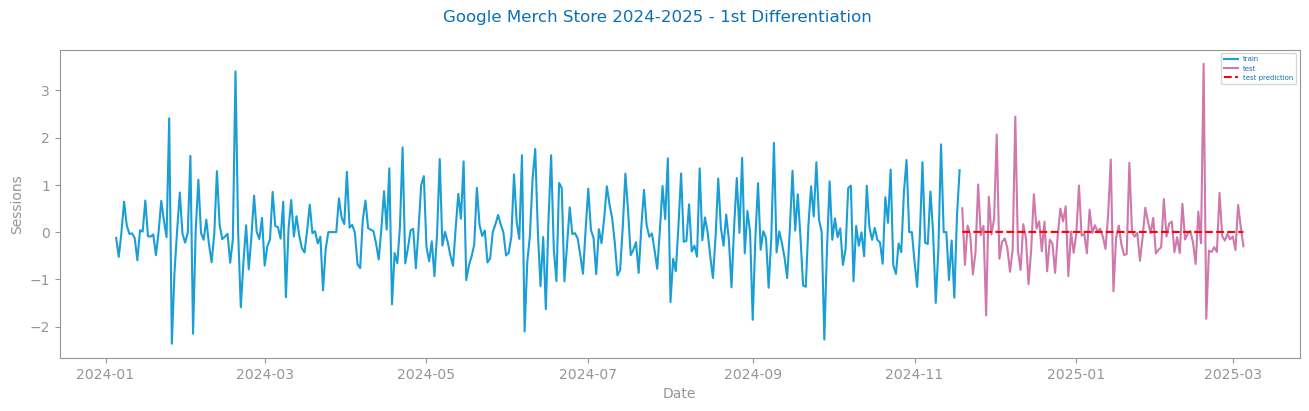

In [7]:
plot_forecasting_series(
    train_1[target],
    test_1[target],
    prd_tst_1,
    title=f"{file_tag} - 1st Differentiation ",
    xlabel='Date',
    ylabel=target,
)

# Differentiation 2 

# Differentiation 2 Strategy Application

In [8]:

def apply_strategy_2(df):

    df_copy=df.copy()
    df_diff = df_copy.diff(periods=2).dropna()

    return df_diff


data_2=apply_strategy_2(data)

series_2: Series = data_2[target]

data_2

,Sessions,Seven-day active users,28-day active users,Events per session,Add to baskets,Checkouts,E-commerce purchases,Average purchase revenue,Purchase revenue,Average session duration,...,Sessions cpc,Sessions cpm,Sessions email,Sessions organic,Sessions other,Sessions referral,season,commercial_season,is_weekend,is_holiday
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-06,-0.643922,0.000000,0.000000,-1.086987,-1.021769,-0.713120,-1.100997,-0.713039,-0.864369,-0.899948,...,-0.136510,0.0,-0.480944,-1.193496,0.0,-0.290961,0.000000,-0.719137,2.213594,0.0
2024-01-07,-0.522227,0.000000,0.000000,0.000000,-1.047102,-0.600522,-0.978664,-2.519214,-1.521175,-1.325638,...,0.074460,0.0,-0.308297,-0.895122,0.0,-0.224833,0.000000,-0.719137,2.213594,0.0
2024-01-08,0.642641,0.000000,0.000000,0.298749,0.650217,0.300261,0.570888,-0.007858,0.282985,0.821906,...,-0.012410,0.0,0.456280,1.247746,0.0,0.330637,0.000000,0.000000,-2.213594,0.0
2024-01-09,0.786112,0.000000,0.000000,-0.062485,0.764216,0.900784,0.897109,1.872395,1.252417,1.325638,...,0.074460,0.0,0.197310,1.021705,0.0,0.271122,0.000000,0.000000,-2.213594,0.0
2024-01-10,0.105042,0.000000,0.000000,0.239803,0.219554,0.487924,0.285444,-0.323669,0.071933,0.078042,...,0.000000,0.0,-0.197310,0.207958,0.0,-0.152093,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,-0.243389,-0.093667,-0.010429,-2.308832,-0.865548,-0.875762,-0.407777,-0.573840,-0.377152,-2.335333,...,-0.434351,0.0,-0.382289,-1.600370,0.0,-1.064651,0.951685,0.719137,2.213594,0.0
2025-03-02,-0.470125,-0.030352,-0.012747,-0.635774,-0.662883,-0.800696,-0.570888,-1.106525,-0.717545,-0.562547,...,-0.235791,0.0,-0.209642,-0.904164,0.0,-0.793529,0.951685,0.719137,2.213594,0.0
2025-03-03,0.195992,-0.097910,-0.033412,2.319219,0.865548,1.351175,0.856331,0.878761,0.819220,2.929361,...,0.918342,0.0,0.456280,1.781203,0.0,0.939009,0.000000,0.000000,-2.213594,0.0


## Differentation 2 evaluate

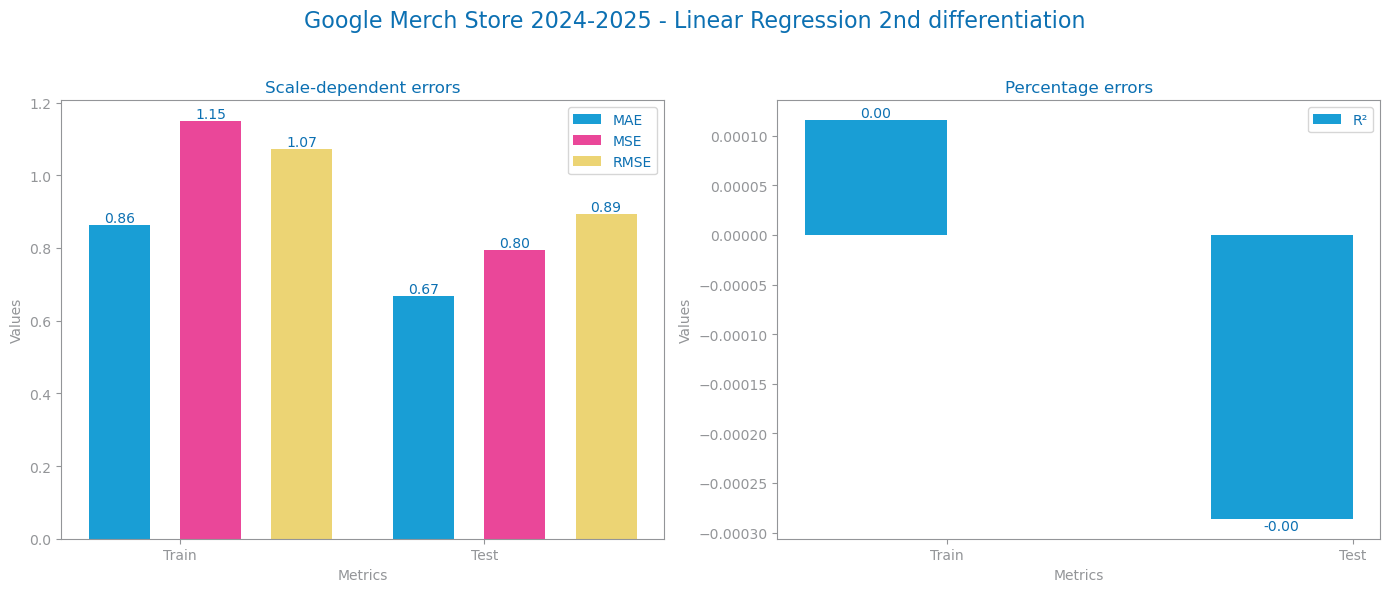

<Figure size 640x480 with 0 Axes>

In [9]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression
from numpy import arange


# Split the data into train and test sets
train_2, test_2 = series_train_test_split(data_2, trn_pct=test_split_threshold)

# Ensure no data leakage
assert not set(train_2.index).intersection(set(test_2.index)), "Data leakage detected: Train and test sets overlap."


# Prepare the training and testing data using the time index as the feature
trnX_2 = arange(len(train_2)).reshape(-1, 1)
trnY_2 = train_2[target].to_numpy()
tstX_2 = arange(len(train_2), len(data_2)).reshape(-1, 1)
tstY_2 = test_2[target].to_numpy()


# Fit the linear regression model
model_2 = LinearRegression()
model_2.fit(trnX_2, trnY_2)

# Predict the training and testing data
prd_trn_2 = Series(model_2.predict(trnX_2), index=train_2.index)
prd_tst_2 = Series(model_2.predict(tstX_2), index=test_2.index)

# Plot the forecasting evaluation
plot_single_model_evaluation(train_2[target], test_2[target], prd_trn_2, prd_tst_2, title=f"{file_tag} - Linear Regression 2nd differentiation")
savefig(f"images/{file_tag}_linear_regression_diff2.png")

## Differentiation 2 Plot

<Axes: xlabel='Date', ylabel='Sessions'>

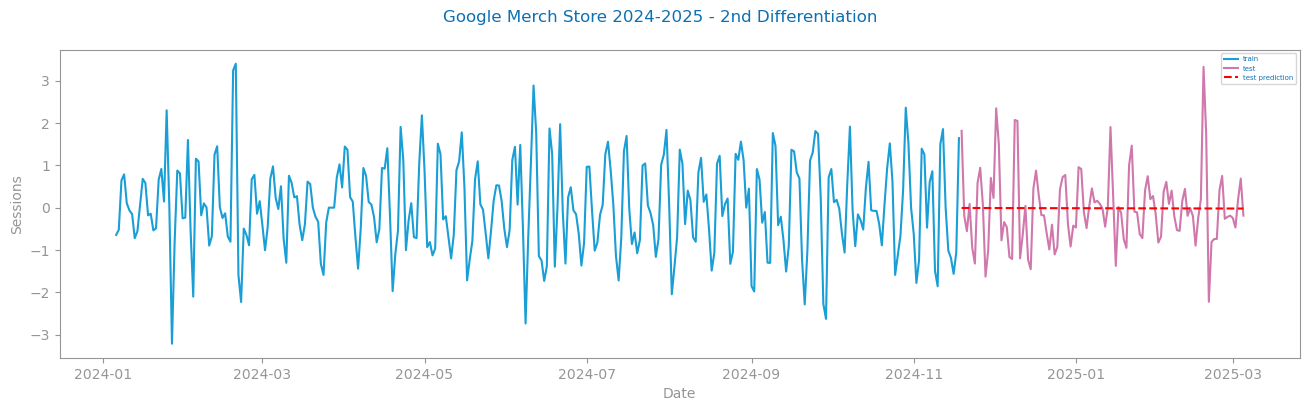

In [10]:
plot_forecasting_series(
    train_2[target],
    test_2[target],
    prd_tst_2,
    title=f"{file_tag} - 2nd Differentiation",
    xlabel='Date',
    ylabel=target,
)

# Approach uplift comparison

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Small constant to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Calculate performance metrics for each model
metrics = {
    "Model": ["1st Differentiation", "2nd Differentiation"],
    "MAE": [
        # mean_absolute_error(test_0[target], prd_tst_0),
        mean_absolute_error(test_1[target], prd_tst_1),
        mean_absolute_error(test_2[target], prd_tst_2),

    ],
    "MSE": [
        # mean_squared_error(test_0[target], prd_tst_0),
        mean_squared_error(test_1[target], prd_tst_1),
        mean_squared_error(test_2[target], prd_tst_2),
        
    ],
    "RMSE": [
        # mean_squared_error(test_0[target], prd_tst_0, squared=False),
        mean_squared_error(test_1[target], prd_tst_1, squared=False),
        mean_squared_error(test_2[target], prd_tst_2, squared=False),
        
    ],
    "R²": [
        # r2_score(test_0[target], prd_tst_0),
        r2_score(test_1[target], prd_tst_1),
        r2_score(test_2[target], prd_tst_2),
        
    ],
    "MAPE": [
        # mean_absolute_percentage_error(test_0[target], prd_tst_0),
        mean_absolute_percentage_error(test_1[target], prd_tst_1),
        mean_absolute_percentage_error(test_2[target], prd_tst_2),
        
    ]
}

# Create a DataFrame to display the metrics
performance_df = pd.DataFrame(metrics)
print(performance_df)

                 Model      MAE       MSE      RMSE        R²          MAPE
0  1st Differentiation  0.46204  0.505228  0.710794 -0.001168  3.334994e+07
1  2nd Differentiation  0.66652  0.795496  0.891906 -0.000286  1.012807e+02


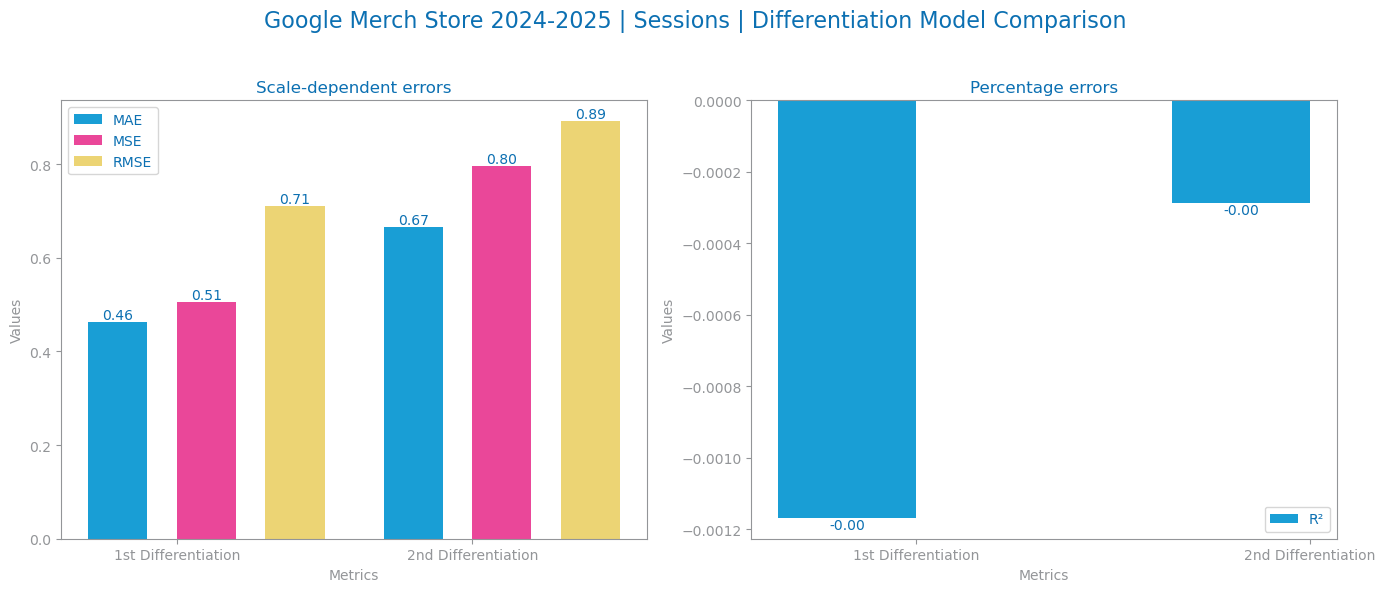

In [12]:
plot_performance_metrics(metrics, title=f"{file_tag} | {target} | Differentiation Model Comparison")

# save to csv

In [13]:
if test_data==False:
    

    data_save=data.copy()

    # apply winning strategy
    data_save=apply_strategy_1(data_save)

    data_save.reset_index(inplace=True)
    
        
    data_save.to_csv(f"data/df_merch_0_2024_agg_time_diff_input.csv", index=False)
    

    print(data_save.columns)

Index(['Date', 'Sessions', 'Seven-day active users', '28-day active users',
       'Events per session', 'Add to baskets', 'Checkouts',
       'E-commerce purchases', 'Average purchase revenue', 'Purchase revenue',
       'Average session duration', 'ARPU', 'ARPPU', 'Views per user',
       'Total users', 'Promotion views', 'Promotion clicks', 'Sessions Mobile',
       'Seven-day active users Mobile', '28-day active users Mobile',
       'New users Mobile', 'Scrolled users Mobile', 'Engaged sessions Mobile',
       'Views Mobile', 'Event count Mobile', 'Events per session Mobile',
       'Item-list view events Mobile', 'Item view events Mobile',
       'Add to baskets Mobile', 'Checkouts Mobile',
       'E-commerce purchases Mobile', 'Average purchase revenue Mobile',
       'Purchase revenue Mobile', 'First time purchasers Mobile',
       'Average session duration Mobile', 'Sessions (not set)',
       'Sessions affiliate', 'Sessions cpc', 'Sessions cpm', 'Sessions email',
       'Sess